# Visual Overview of Plotting Functions

Matplotlib has a number of different plotting functions -- many more than we'll cover here, in fact. There's a more complete list in the pyplot documentation, and Matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

## The Basics: 1D series/points
### What we've mentioned so far
<a  href="examples/plot_example.py"><img src="images/plot_example.png"></a>
<a href="examples/scatter_example.py"><img src="images/scatter_example.png"></a>
### Other common plot types
<a href="examples/bar_example.py"><img src="images/bar_example.png"></a>
<a href="examples/fill_example.py"><img src="images/fill_example.png"></a>

## 2D Arrays and Images
<a href="examples/imshow_example.py"><img src="images/imshow_example.png"></a>
<a href="examples/pcolor_example.py"><img src="images/pcolor_example.png"></a>
<a href="examples/contour_example.py"><img src="images/contour_example.png"></a>

## Vector Fields
<a href="examples/vector_example.py"><img src="images/vector_example.png"></a>

## Data Distributions
<a href="examples/statistical_example.py"><img src="images/statistical_example.png"></a>

# Detailed Examples (of a few of these)

In [1]:
# Let's get our standard imports out of the way
from __future__ import print_function
import numpy as np
import matplotlib
matplotlib.use('nbagg')

%matplotlib inline 
import matplotlib.pyplot as plt

# Input Data: 1D Series

We've briefly mentioned `ax.plot(x, y)` and `ax.scatter(x, y)` to draw lines and points, respectively.  We'll cover some of their options (markers, colors, linestyles, etc) in the next section. Let's move on to a couple of other common plot types.

### Bar Plots: `ax.bar(...)` and `ax.barh(...)`
<img src="images/bar_example.png">

Bar plots are one of the most common plot types.  Matplotlib's `ax.bar(...)` method can also plot general rectangles, but the default is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

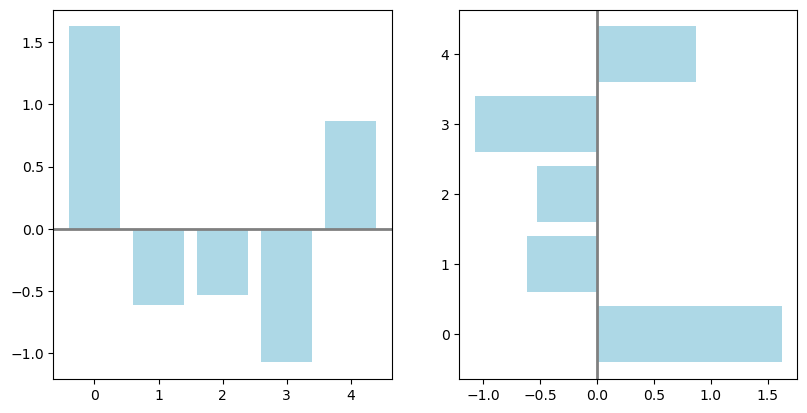

In [2]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = #####
horiz_bars = #####

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].#####
axes[1].#####

plt.show()

Note that we held on to what `ax.bar(...)` returned.  Matplotlib plotting methods return an `Artist` or a sequence of artists.  Anything you can see in a Matplotlib figure/axes/etc is an `Artist` of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism.

Let's re-visit that last example and modify what's plotted.  In the case of `bar`, a container artist is returned, so we'll modify its contents instead of the container itself (thus, `for bar in vert_bars`).

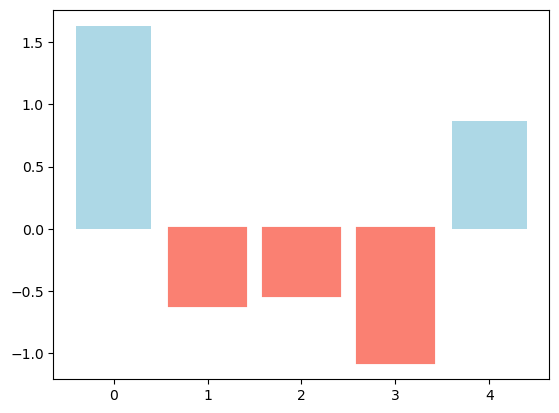

In [3]:
fig, ax = plt.subplots()
vert_bars = #####

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    if height < 0:
        #####

plt.show()

Keep in mind that any plotting method in matplotlib returns the artists that are plotted. We'll use it again, particularly when we get to adding colorbars to images.

### Filled Regions: `ax.fill(x, y)`, `fill_between(...)`, etc
<img src="images/fill_example.png">

Of these functions, `ax.fill_between(...)` is probably the one you'll use the most often.  In its most basic form, it fills between the given y-values and 0:

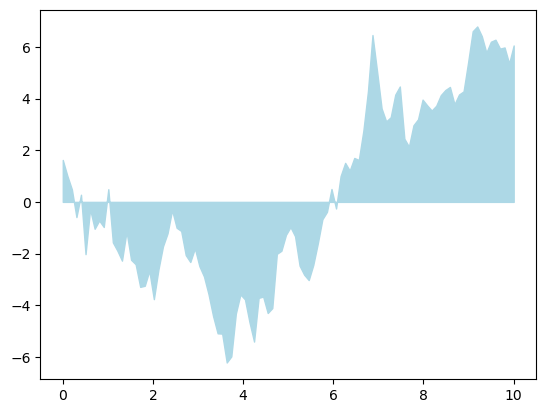

In [4]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
#####
plt.show()

However, it can also be used to fill between two curves.  This is particularly useful when you want to show an envelope of some sort (e.g. error, confidence, amplitude, etc).

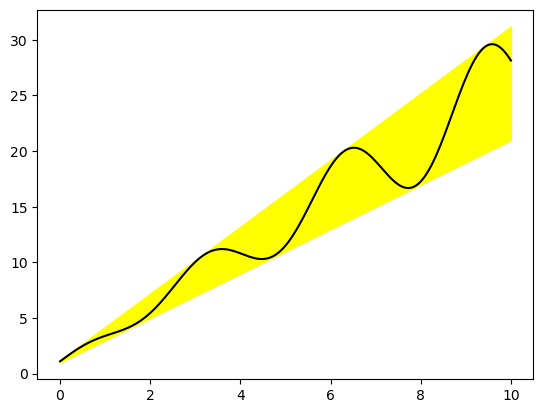

In [5]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
#####

# Plot the "centerline" with `plot`
#####
plt.show()

## `data` keyword argument

When using nested data structures such as h5py objects, Pandas DataFrames, or XArrays, the data can be accessed via `[]` like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. So, the `data` keyword argument was added to almost all of the plotting functions. With this feature, one can pass in a single dictionary-like object as `data`, and use the string key names in the place of the usual input data arguments.

Let's revisit the above example:

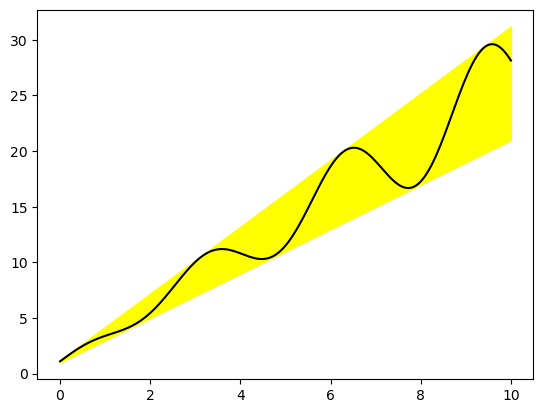

In [6]:
x = np.linspace(0, 10, 200)
data_obj = {'x': x,
            'y1': 2 * x + 1,
            'y2': 3 * x + 1.2,
            'mean': 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1}

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
#####

# Plot the "centerline" with `plot`
#####

plt.show()

# Input Data: 2D Arrays or Images

There are several options for plotting 2D datasets.  `imshow`, `pcolor`, and `pcolormesh` have a lot of overlap, at first glance.  The image below is meant to clarify that somewhat.

<img src="images/imshow_example.png">
<img src="images/pcolor_example.png">

In short, `imshow` can interpolate and display large arrays very quickly, while `pcolormesh` and `pcolor` are much slower, but can handle flexible (i.e. more than just rectangular) arrangements of cells.

We won't dwell too much on the differences and overlaps here.  They have overlapping capabilities, but different default behavior because their primary use-cases are a bit different (there's also `matshow`, which is `imshow` with different defaults).  

Instead we'll focus on what they have in common.

`imshow`, `pcolor`, `pcolormesh`, `scatter`, and any other Matplotlib plotting methods that map a range of data values onto a colormap will return artists that are instances of `ScalarMappable.`  In practice, what that means is a) you can display a colorbar for them, and b) they share several keyword arguments.

### Colorbars

Let's add a colorbar to the figure to display what colors correspond to values of `data` we've plotted. 

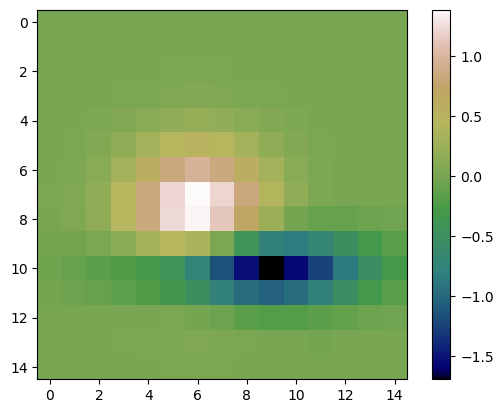

In [7]:
from matplotlib.cbook import get_sample_data
data = np.load('assets/bivariate_normal.npy')

fig, ax = plt.subplots()
#####
#####
plt.show()

You may notice that `colorbar` is a `Figure` method and not an `Axes` method.  That's because `colorbar` doesn't operate on the axes. Instead, it shrinks the current axes by a bit, adds a _new_ axes to the figure, and places the colorbar on that axes.

The new axes that `fig.colorbar` creates is fairly limited in where it can be positioned.   For example, it's always outside the axes it "steals" room from. Sometimes you may want to avoid "stealing" room from an axes or maybe even have the colorbar _inside_ another axes.  In that case, you can manually create the axes for the colorbar and position it where you'd like:

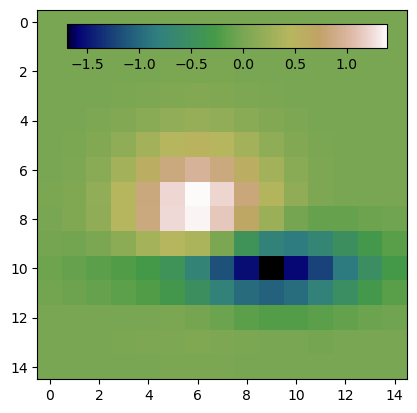

In [8]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(data, cmap='gist_earth')
#####
plt.show()

  ### Shared parameters for `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
  As we mentioned earlier, any plotting method that creates a `ScalarMappable` will have some common kwargs.  The ones you'll use the most frequently are:
  
  * `cmap` : The colormap (or name of the colormap) used to display the input.  (We'll go over the different colormaps in the next section.)
  * `vmin` : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
  * `vmax` : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
  * `norm` : A `Normalize` instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between `vmin` and `vmax`, but other norms are available (e.g. `LogNorm`, `PowerNorm`, etc).
  
`vmin` and `vmax` are particularly useful.  Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0.

See the documentation for longer discussions of [colormaps](https://matplotlib.org/tutorials/colors/colormaps.html) and [norms](https://matplotlib.org/tutorials/colors/colormapnorms.html).

As an example of that, let's use a divergent colormap with the data we showed earlier. 

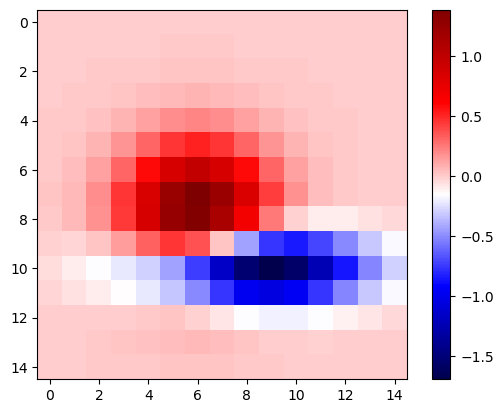

In [9]:
from matplotlib.cbook import get_sample_data
data = np.load('assets/bivariate_normal.npy')

fig, ax = plt.subplots()
im = ax.imshow(data, cmap=#####)
fig.colorbar(im)
plt.show()

In this case, we'd really like the white in the colormap to correspond to 0.  A quick way to do this is to make the `vmin` equal to the negative of the `vmax`.  

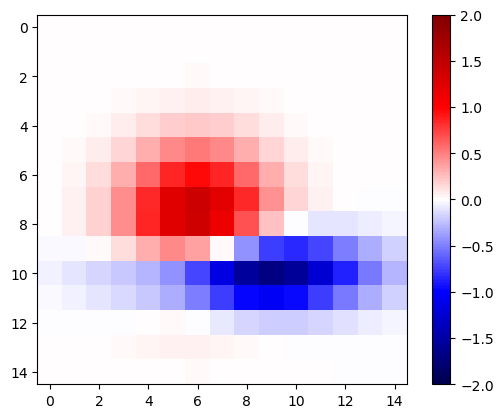

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(data, 
               #####)
fig.colorbar(im)
plt.show()

`vmin` and `vmax` are also very useful when we want multiple plots to share one colorbar, as our next exercise will do.